In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Code_love_r\Desktop\Musk\musk_csv.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [4]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


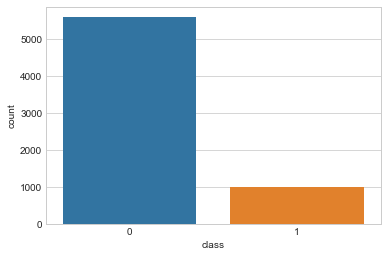

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [7]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [8]:
final=data.drop(['molecule_name','conformation_name','ID'],axis=1)
final.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [9]:
a=final.values
X=a[:,0:165]


In [10]:
Y=a[:,166]
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
X.shape

(6598, 165)

In [12]:
Y.shape

(6598,)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

C:\Users\Code_love_r\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
model=Sequential()
model.add(Dense(output_dim=10,input_shape=(165,),init='uniform',activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


W1214 20:57:53.767720  2976 deprecation_wrapper.py:119] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\Code_love_r\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(165,), activation="relu", units=10, kernel_initializer="uniform")`
  
W1214 20:57:53.780686  2976 deprecation_wrapper.py:119] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1214 20:57:53.782679  2976 deprecation_wrapper.py:119] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

C:\Users\Code_love_r\Anaconda3\lib\site-packages\ipykernel_lau

In [16]:
# Fit the model
history=model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=30, batch_size=10)

W1214 20:57:54.089858  2976 deprecation_wrapper.py:119] From C:\Users\Code_love_r\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 5278 samples, validate on 1320 samples
Epoch 1/30
5278/5278 [==============================] - 1s 131us/step - loss: 0.2240 - acc: 0.9172 - val_loss: 0.1830 - val_acc: 0.9379
Epoch 2/30
5278/5278 [==============================] - 0s 89us/step - loss: 0.1441 - acc: 0.9468 - val_loss: 0.1427 - val_acc: 0.9402
Epoch 3/30
5278/5278 [==============================] - 0s 90us/step - loss: 0.1233 - acc: 0.9517 - val_loss: 0.0962 - val_acc: 0.9652
Epoch 4/30
5278/5278 [==============================] - 0s 88us/step - loss: 0.0994 - acc: 0.9596 - val_loss: 0.0917 - val_acc: 0.9705
Epoch 5/30
5278/5278 [==============================] - 1s 103us/step - loss: 0.0845 - acc: 0.9695 - val_loss: 0.0811 - val_acc: 0.9742
Epoch 6/30
5278/5278 [==============================] - 1s 113us/step - loss: 0.0777 - acc: 0.9714 - val_loss: 0.0516 - val_acc: 0.9811
Epoch 7/30
5278/5278 [==============================] - 1s 106us/step - loss: 0.0667 - acc: 0.9750 - val_loss: 0.0753 - val_acc: 0.9742
Epo

In [29]:
def mean_squared_error(actual, predicted):
    sum_square_error = 0.0
    for i in range(len(actual)):
        sum_square_error += (actual[i] - predicted[i])**2.0
    mean_square_error = 1.0 / len(actual) * sum_square_error
    return mean_square_error

In [17]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

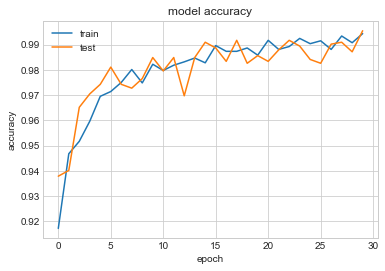

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

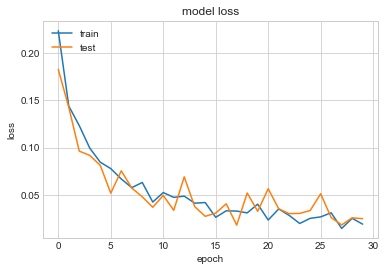

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
predict=model.predict(X_test)
predict=np.where(predict > 0.5, 1, 0)
predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [21]:
np.unique(predict)

array([0, 1])

In [30]:
mean_squared_error(Y_test, predict)

array([0.00454545])

In [22]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(Y_test, predict) 



In [23]:
results

array([[1106,    5],
       [   1,  208]], dtype=int64)

In [24]:
Tp=results[0][0]
Fn=results[0][1]
Fp=results[1][0]
Tn=results[1][1]

In [25]:
#Accuracy

accuracy=(Tp+Tn)/(Tp+Fn+Fp+Tn)
accuracy

0.9954545454545455

In [26]:
#Precision
precision=Tp/(Tp+Fp)
precision

0.999096657633243

In [27]:
#Recall
recall=Tp/(Tp+Fn)
recall

0.9954995499549955

In [28]:
#F1_score
F1_score=(2*recall*precision)/(recall+precision)
F1_score

0.9972948602344454